### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [29]:
data = pd.read_csv('data/coupons.csv')

In [37]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [449]:
# Check the number of null values in each column
data.info()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [451]:
# Examine the unique non-null values in the 'car' column to identify if those are relavant
data['car'].dropna().value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

#### Findings from Dataset Investigation
Below are the findings from dataset investigation

* The '***car***' column has only 108/12684 non-null values. The values are not so relevant to the current analysis, hence the car column will be dropped.
* The columns ***'CoffeeHouse', 'Bar', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'*** have a few null values. Since these columns are highly relevant to the analysis, these null values will be replaced with a suitable/relevant values from the exising set of values.

3. Decide what to do about your missing data -- drop, replace, other...

#### Data Cleaning and Preprocessing
The following updates are done to the data
* Drop the '***car***' column
* Replace the null values in the columns ***'CoffeeHouse', 'Bar', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'*** with the value '***never***' as this seems to be more appropriate to the context.

In [ ]:
cleaned_data = data.drop(columns=['car'])

In [96]:
cleaned_data['CoffeeHouse'] = cleaned_data['CoffeeHouse'].fillna('never')
cleaned_data['Bar'] = cleaned_data['Bar'].fillna('never')
cleaned_data['CarryAway'] = cleaned_data['CarryAway'].fillna('never')
cleaned_data['RestaurantLessThan20'] = cleaned_data['RestaurantLessThan20'].fillna('never')
cleaned_data['Restaurant20To50'] = cleaned_data['Restaurant20To50'].fillna('never')

* Display and examine the counts of all the unique values in the columns

In [418]:
for col in cleaned_data.columns:
    print(cleaned_data[col].value_counts())
    print("")


destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

expiration
1d    7091
2h    5593
Name: count, dtype: int64

gender
Female    6511
Male      6173
Name: count, dtype: int64

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

maritalStatus
Married partner      5100
Single               475

4. What proportion of the total observations chose to accept the coupon?


In [455]:
proportion_accepted_coupons = cleaned_data['Y'].mean()
print(f"{proportion_accepted_coupons:.2%}")

56.84%


Proportion of the total observations chose to accept the coupon: 56.84%

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

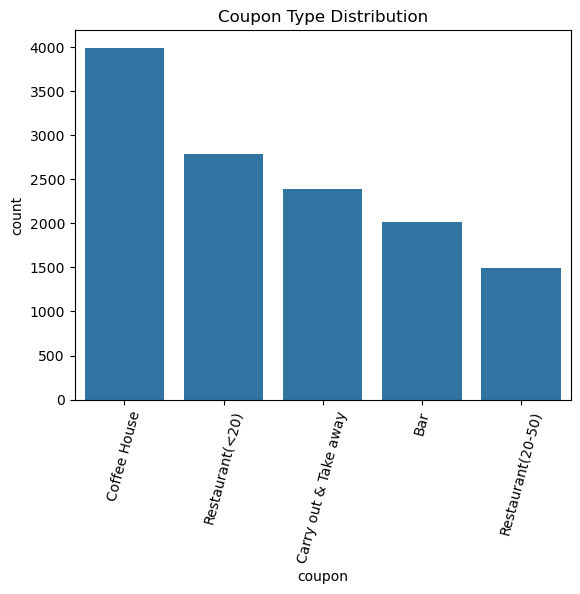

In [456]:
coupon_counts = cleaned_data['coupon'].value_counts().reset_index()
sns.barplot(data=coupon_counts, x='coupon', y='count')
plt.title('Coupon Type Distribution')
plt.xticks(rotation=75)

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature Distribution')

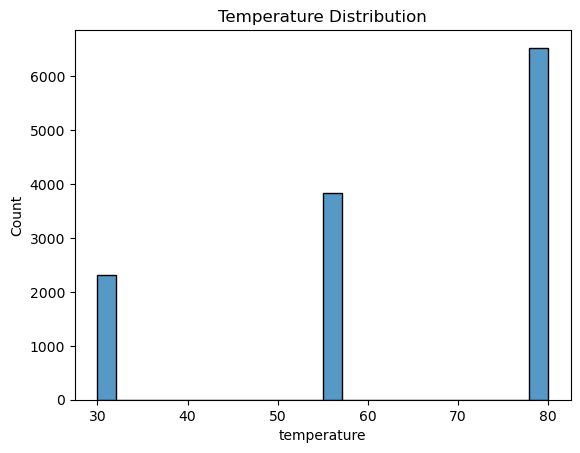

In [173]:
sns.histplot(cleaned_data['temperature'])
plt.title('Temperature Distribution')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [464]:
bar_data = cleaned_data.query('coupon == "Bar"')
print(type(bar_data))
bar_data.head()

<class 'pandas.core.frame.DataFrame'>


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [494]:
bar_coupon_acceptance_rate = bar_data['Y'].mean()
print(f"{bar_coupon_acceptance_rate:.2%}")

41.00%


Proportion of the total bar coupons accepted: 41.00%

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [487]:
bar_freq_3less = ['less1', '1~3']
bar_data_3less_acceptance = bar_data[(bar_data['Bar'].isin(bar_freq_3less))]['Y'].mean()
print(f"{bar_data_3less_acceptance:.2%}")

bar_freq_more3 = ['4~8', 'gt8']
bar_data_more3_acceptance = bar_data[(bar_data['Bar'].isin(bar_freq_more3))]['Y'].mean()
print(f"{bar_data_more3_acceptance:.2%}")

52.74%
76.88%


* Coupon acceptance rate of those who went to bar 3 or fewer times: 52.74%
* Coupon acceptance rate of those who went to bar more than 3 times: 76.88%
* Finding: The drivers who go to bar more frequently have higher chances to accept the coupon

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [493]:
bar_freq_more1 = ['1~3','4~8','gt8']
bar_more1 = bar_data.query('Bar in @bar_freq_more1')

bar_more1_age_more25_acceptance = bar_more1[~bar_more1['age'].isin(['21', 'below21'])]['Y'].mean()
print(f"{bar_more1_age_more25_acceptance:.2%}")

bar_more1_age_less25_acceptance = bar_more1[bar_more1['age'].isin(['21', 'below21'])]['Y'].mean()
print(f"{bar_more1_age_less25_acceptance:.2%}")


69.52%
67.05%


* Coupon acceptance rate of the drivers over the age of 25 who went to bar more than once a month : 69.52%
* Coupon acceptance rate of the drivers with age 25 or less who went to bar more than once a month : 67.05%
* Finding: Between the drivers who are over age of 25 years and those below 25 years, there is not much difference in the acceptance rate. So the age did not influence the acceptance rate much. However, a more details age grouping is needed to find any trend with age.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [507]:
bar_more1_0kids_and_farming_acceptance = bar_more1[(bar_more1['passanger'] != 'Kid(s)') & 
                                                   (bar_more1['occupation'] != 'Farming Fishing & Forestry')]['Y'].mean()
print(f"{bar_more1_0kids_and_farming_acceptance:.2%}")

bar_more1_kids_or_farming_acceptance = bar_more1[(bar_more1['passanger'] == 'Kid(s)') | 
                                                 (bar_more1['occupation'] == 'Farming Fishing & Forestry')]['Y'].mean()
print(f"{bar_more1_kids_or_farming_acceptance:.2%}")


71.32%
37.78%


* Coupon acceptance rate of the drivers who go to bar more than once a month and had passengers that were not a kid and had occupation other than "Farming Fishing & Forestry": 71.32%
* Coupon acceptance rate of the drivers who go to bar more than once a month and had passengers that were either a kid or had occupation "Farming Fishing & Forestry": 37.78%
* Finding: The drivers with passengers that were not a kind and had occupation other than "Farming Fishing & Forestry" are highly likely to accept the bar coupon than others. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [511]:
#Compare the acceptance rates between those drivers who go to bars more than once a month and are under the age of 30 to those who are of age 30 or more
age_less30 = ['21', 'below21', '26']

bar_more1_age_less25_acceptance_rate = bar_more1[bar_more1['age'].isin(age_less30)]['Y'].mean()
print(f"{bar_more1_age_less25_acceptance_rate:.2%}")

bar_more1_age_25more_acceptance_rate = bar_more1[~bar_more1['age'].isin(age_less30)]['Y'].mean()
print(f"{bar_more1_age_25more_acceptance_rate:.2%}")


72.17%
64.14%


* Coupon acceptance rate of the drivers who go to bar more than once a month and are under the age of 30: 72.17%
* Coupon acceptance rate of the drivers who to go bar more than once a month and are over the age of 30: 64.14%
* Finding: The younger drivers who go to bar frequently are highly likely to accept the coupon over older drivers.

In [515]:
#Compare the acceptance rates between the drivers who go to bars more than once a month and had passengers that were kids to those with passengers that were not kids

# bar_more1_kids = bar_more1[(bar_more1['passanger'] == 'Kid(s)')]
# bar_more1_kids_accepted = bar_more1_kids[bar_more1_kids['Y']==1]
# bar_more1_kids_accepted_rate = bar_more1_kids_accepted.shape[0] / bar_more1_kids.shape[0] * 100

# bar_more1_nokids = bar_more1[(bar_more1['passanger'] != 'Kid(s)')]
# bar_more1_nokids_accepted = bar_more1_nokids[bar_more1_nokids['Y']==1]
# bar_more1_nokids_accepted_rate = bar_more1_nokids_accepted.shape[0] / bar_more1_nokids.shape[0] * 100


# print(f"bar_more1_kids_accepted_rate  : {bar_more1_kids_accepted_rate:.2f}")
# print(f"bar_more1_nokids_accepted_rate : {bar_more1_nokids_accepted_rate:.2f}")

In [513]:
#Compare the acceptance rates for drivers no kid passengers who go to bar more than once a month based on their accupation
# bar_more1_nokids = bar_more1[(bar_more1['passanger'] != 'Kid(s)')]

# acceptance_rate_by_occupation = bar_more1_nokids.groupby('occupation')['Y'].mean().sort_values(ascending=False).reset_index()

# sns.barplot(data=acceptance_rate_by_occupation, x='occupation', y='Y')
# plt.title('Coupon Type Distribution')
# plt.xticks(rotation=75)


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

* Frequency of bar visits has direct correlation to the coupon acceptancy.
* The drivers who do not have kids as passangers and are not in agriculture related occupation have much higher acceptance rate compared to others.
* The drivers who are over the age of 30 are less likely to accept the coupons compared to those who are under the age of 30. When this is analyzed with other data  related to the group under the age of 25, it is evident that drivers between with age between 25 and 30 have higher chances of acceptance.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Coffee House Coupon Acceptance Analysis
Task:
Identify the key characteristics of drivers that influence the acceptance of a Coffee House coupon.


1. How does coffee house visits influence the coupon acceptance ? Does the gender make any difference ?

Text(0.5, 1.0, 'Coffee House Coupon Acceptance Rate vs Visit Frequency')

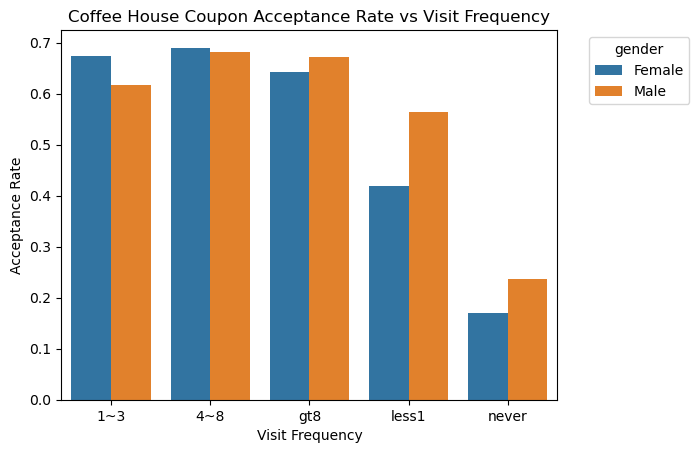

In [433]:
ch_data = cleaned_data.query('coupon == "Coffee House"')
ch_visit_data = ch_data.groupby(['CoffeeHouse', 'gender'])['Y'].mean().reset_index()
ch_visit_data.rename(columns={'Y': 'Acceptance Rate', 'CoffeeHouse': 'Visit Frequency'}, inplace=True)

sns.barplot(data=ch_visit_data, x='Visit Frequency', y='Acceptance Rate', hue='gender')
plt.legend(title='gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Coffee House Coupon Acceptance Rate vs Visit Frequency')

***Findings***

While acceptance rates increased with more frequent visits, the gender did not show a significant difference in the trends.

2. Does the time of day make a difference? And will the type of destination has any influence ?

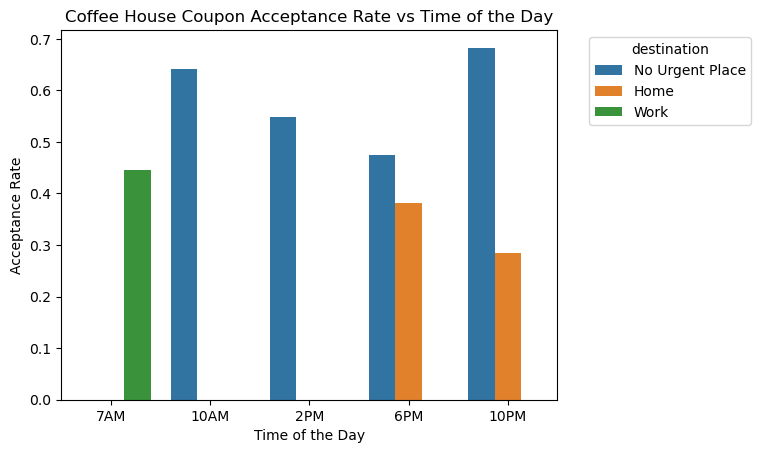

In [438]:
ch_time_data = ch_data.groupby(['time', 'destination'])['Y'].mean().reset_index()
ch_time_data.rename(columns={'Y': 'Acceptance Rate', 'time': 'Time of the Day'}, inplace=True)

time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
sns.barplot(data=ch_time_data, x='Time of the Day', y='Acceptance Rate', hue='destination', order=time_order)
plt.legend(title='destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Coffee House Coupon Acceptance Rate vs Time of the Day')
plt.savefig('images/ch_acceptance_with_time.png')

***Findings***

Evening times do have high acceptance rate and generally driver travelling to non-urgent places tend to accept the coupons more.

3. Does the presence of passengers (e.g., friends, alone, partner) influence acceptance?

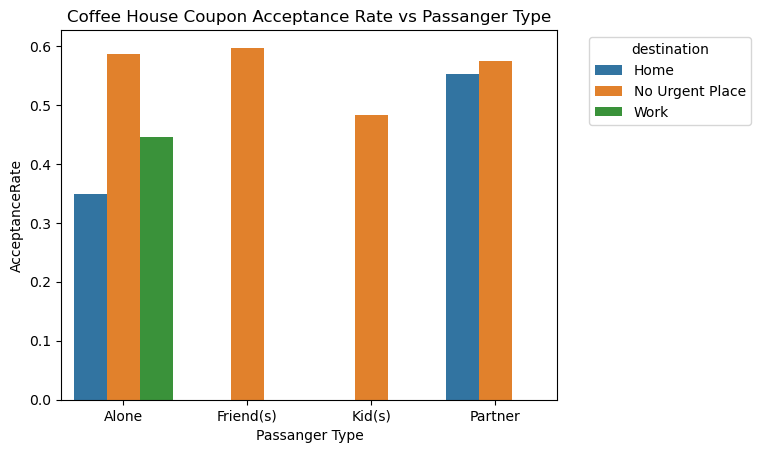

In [436]:
ch_pass_data = ch_data.groupby(['passanger', 'destination'])['Y'].mean().reset_index()
ch_pass_data.rename(columns={'Y': 'AcceptanceRate', 'passanger': 'Passanger Type'}, inplace=True)
ch_pass_data
sns.barplot(data=ch_pass_data, x='Passanger Type', y='AcceptanceRate', hue='destination')
plt.title('Coffee House Coupon Acceptance Rate vs Passanger Type')
plt.legend(title='destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('images/ch_acceptance_with_passanger.png')

***Findings***

While the drivers travelling alone tend to accept the coupons more often than those travelling with kids, but overall drivers travelling either alone or with partner have higher chances of accepting the coupon.


4. Do lower or higher income drivers tend to accept coupons more often ?

income
$25000 - $37499     640
$12500 - $24999     594
$37500 - $49999     590
$50000 - $62499     548
$100000 or More     534
Less than $12500    308
$62500 - $74999     275
$87500 - $99999     271
$75000 - $87499     236
Name: count, dtype: int64


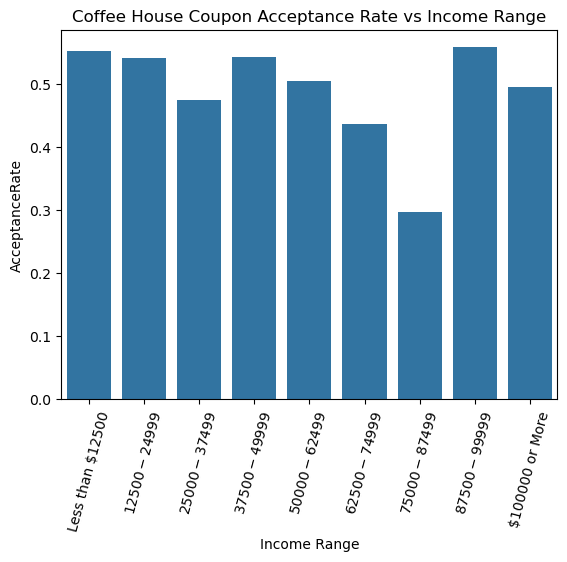

In [439]:
print(ch_data['income'].value_counts())
income_order = [
    "Less than $12500",
    "$12500 - $24999",
    "$25000 - $37499",
    "$37500 - $49999",
    "$50000 - $62499",
    "$62500 - $74999",
    "$75000 - $87499",
    "$87500 - $99999",
    "$100000 or More"
]

ch_income_data = ch_data.groupby('income')['Y'].mean().reset_index()
ch_income_data.rename(columns={'Y': 'AcceptanceRate', 'income': 'Income Range'}, inplace=True)
ch_income_data
sns.barplot(data=ch_income_data, x='Income Range', y='AcceptanceRate', order=income_order)
plt.title('Coffee House Coupon Acceptance Rate vs Income Range')
plt.xticks(rotation=75)
plt.savefig('images/ch_acceptance_with_income.png')

***Findings***

No significant trend observed with income range and its correlation to the coupon acceptance rate.


5. Compare the coupon acceptance rate based on coupon expiration. Find out whether coupons with 1-day expiry have more acceptance rate over coupons with 2-hour expiry?

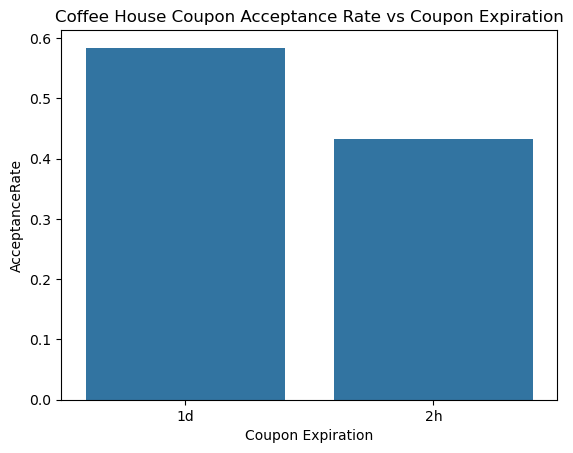

In [440]:
ch_data['expiration'].value_counts()
ch_expiry_data = ch_data.groupby('expiration')['Y'].mean().reset_index()
ch_expiry_data.rename(columns={'Y': 'AcceptanceRate', 'expiration': 'Coupon Expiration'}, inplace=True)
ch_expiry_data
sns.barplot(data=ch_expiry_data, x='Coupon Expiration', y='AcceptanceRate')
plt.title('Coffee House Coupon Acceptance Rate vs Coupon Expiration')
plt.savefig('images/ch_acceptance_with_expiration.png')

***Findings***

Coupon acceptance rate is higher for the coupons expiring in a day when compared to those expring in 2 hours. 

6. Based on the prevoius plot, coupons with 1-day expiry have higher acceptance rate. But does the time of the day influence this in any mannger ?

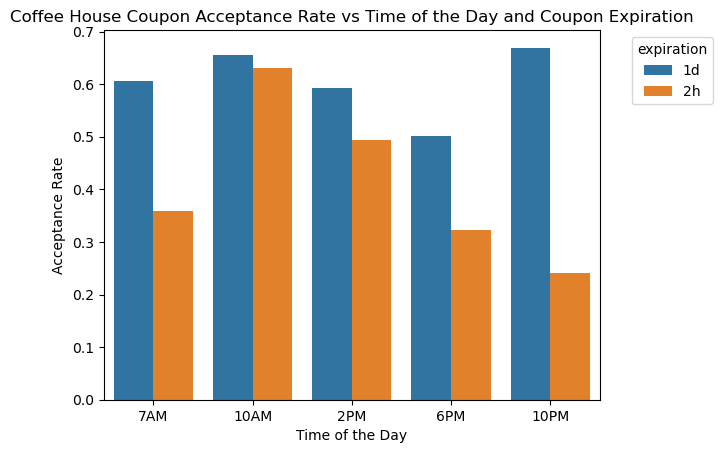

In [441]:
ch_time_expiry_data = ch_data.groupby(['time', 'expiration'])['Y'].mean().reset_index()
ch_time_expiry_data.rename(columns={'Y': 'Acceptance Rate', 'time': 'Time of the Day'}, inplace=True)

time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
sns.barplot(data=ch_time_expiry_data, x='Time of the Day', y='Acceptance Rate', hue='expiration', order=time_order)
plt.title('Coffee House Coupon Acceptance Rate vs Time of the Day and Coupon Expiration')
plt.legend(title='expiration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('images/ch_acceptance_with_time_expiration.png')

***Findings***

Overall 1-day expiry coupons have higher demand than those with 2-hour expiry. Though there is not significant difference in the earlier hours of the day, but specifically in the evenings, the coupon acceptance rate is significantly higher for 1-day expiration coupons.

7. Are younger people highly likely to accept the coffee house coupon compared to older people ? 

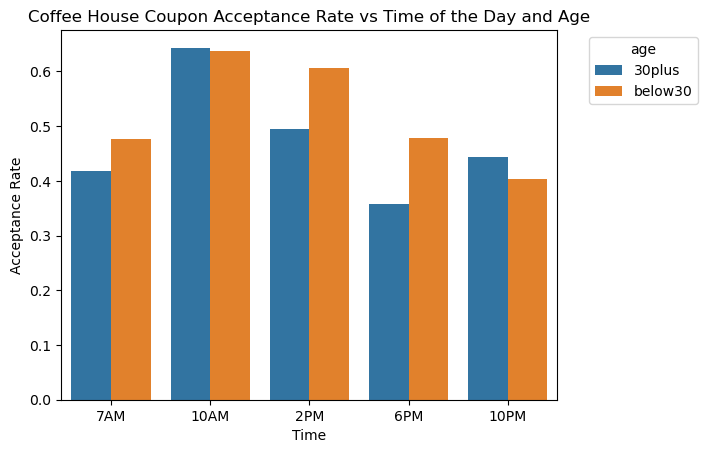

In [448]:
#define age group
def age_group(age):
    if age in ['below21', '21', '26']:
        return 'below30'
    else:
        return '30plus'
        
ch_time_age_data = ch_data.copy()
ch_time_age_data['age_group'] = ch_time_age_data['age'].apply(age_group)
ch_time_age_data = ch_time_age_data.groupby(['time', 'age_group'])['Y'].mean().reset_index()
ch_time_age_data.rename(columns={'Y': 'Acceptance Rate', 'time': 'Time'}, inplace=True)

time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']

sns.barplot(data=ch_time_age_data, x='Time', y='Acceptance Rate', hue='age_group', order=time_order)
plt.title('Coffee House Coupon Acceptance Rate vs Time of the Day and Age')
plt.legend(title='age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('images/ch_acceptance_with_time_age.png')

***Findings***

Though coupon acceptance rate is slightly higher in the age group - below30, but it is not significant to call out.

## Findings Summary

***Visit Frequency & Gender***

Coupon acceptance rates increased with more frequent visits. The gender did not have a notable influence on the trends.

***Time of the day & destination***

Coupon acceptance rates were higher in the evening hours, especially among those drivers heading to a non-urgent destinations.

***Passanger Type***

Drivers travelling alone or with partners are more likely to accept coupons than those travelling with kids.

***Income Range***

There is no strong correlation is noticed between income ranges and the coupon acceptance rates.

***Coupon Expiration Time***

Coupons with a 1-day expiration had significantly higher acceptance rates than those expiring in 2 hours.
This trend was especially noticed during evening hours, while differences were minimal earlier in the day.

***Time of the day & age***

Though coupon acceptance rate is slightly higher in the age group - below30, but it is not significant to call out.


## Conclusion

Based on the above analysis, the key factors that influence the coupon acceptance rate are time of the day, passangers and coupon expiry. The drivers travelling alone or with partners tend to accept the coffee house coupons more than those travelling with friends/kids. The coupons with 1-day expiry are more popular in the evening hours while coupons with 2-hour expiry are more popular in the afternoon hours.